### 1-problem Definition and understanding
#####  Analyze the dataset and segment customers based on relevant parameters like Gender ,Age, or any other criteria you find important.

##### 1-1 Ask_questions

- Explore distribution of data to check outlier

-Show distribution of Gender

-explore type of Gender with Age

-explore which typr of gender get high Annual Income

-explore relation between Annual_Income with Spending_score

-segment gender according to age with Annual_Income and Spending_score

#### 2-Data_Understanding

CustomerID: Unique ID assigned to the customer

Annual Income (k$): Annual Income of the customee


Gender: Gender of the customer

Age: Age of the customer

Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature

####3- Data_Wrangling

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
#to show all columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.shape

(200, 5)

In [ ]:
#check type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#check duplicated values
df.duplicated().all()

False

In [ ]:
df.describe(include="all").style.background_gradient(axis=None, cmap='coolwarm')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,nan,2,nan,nan,nan
top,nan,Female,nan,nan,nan
freq,nan,112,nan,nan,nan
mean,100.500000,nan,38.850000,60.560000,50.200000
std,57.879185,nan,13.969007,26.264721,25.823522
min,1.000000,nan,18.000000,15.000000,1.000000
25%,50.750000,nan,28.750000,41.500000,34.750000
50%,100.500000,nan,36.000000,61.500000,50.000000
75%,150.250000,nan,49.000000,78.000000,73.000000


In [ ]:
#check missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### 4-Expaltory Data Analyst (EDA)

In [ ]:
# shown the number of unique values in categorical data
for feature in df.columns:
    print(feature,':',df[feature].nunique())

CustomerID : 200
Gender : 2
Age : 51
Annual Income (k$) : 64
Spending Score (1-100) : 84


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

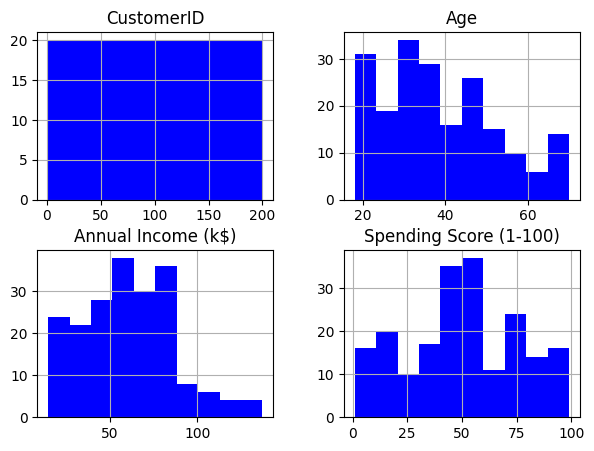

In [ ]:
#check distribution of data
df.hist(figsize=(7,5),color='blue')

In [ ]:
pie=df['Gender'].value_counts()

([<matplotlib.patches.Wedge at 0x7b9a5e877370>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

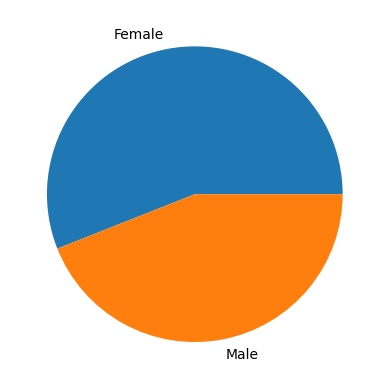

In [ ]:
plt.pie(pie,labels=['Female','Male'])

In [ ]:
#delet ID column
del_col=df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Axes: xlabel='Gender', ylabel='Age'>

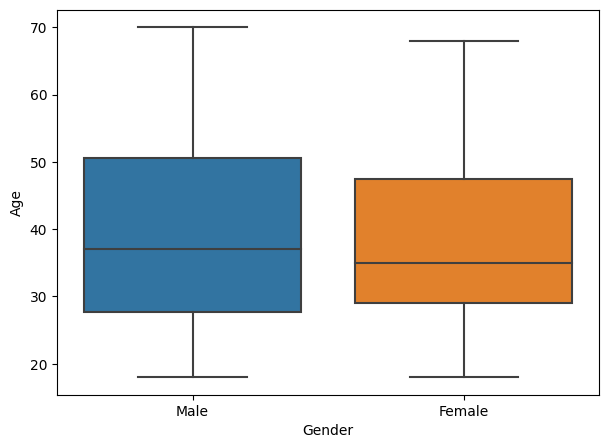

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y='Age',x='Gender',data=df)

In [ ]:
max_income=df.groupby(['Gender']).max()['Annual Income (k$)']

In [ ]:
max_income.head()

Gender
Female    126
Male      137
Name: Annual Income (k$), dtype: int64

In [ ]:
min_income=df.groupby(['Gender']).min()['Annual Income (k$)']

In [ ]:
min_income.head()

Gender
Female    16
Male      15
Name: Annual Income (k$), dtype: int64

In [ ]:
max_score=df.groupby(['Gender']).max()['Spending Score (1-100)']

In [ ]:
max_score.head()

Gender
Female    99
Male      97
Name: Spending Score (1-100), dtype: int64

In [ ]:
min_score=df.groupby(['Gender']).min()['Spending Score (1-100)']


In [ ]:
min_score.head()

Gender
Female    5
Male      1
Name: Spending Score (1-100), dtype: int64

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

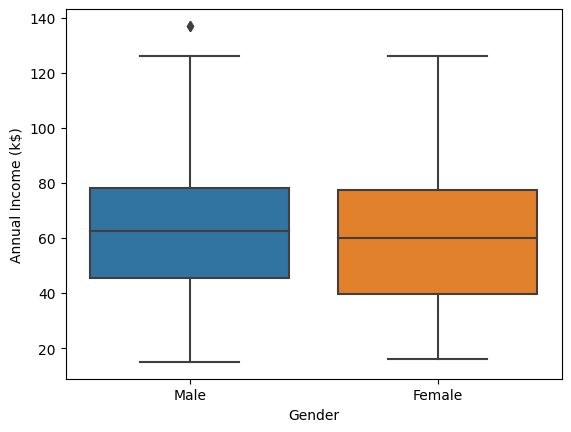

In [ ]:
sns.boxplot(y='Annual Income (k$)', x='Gender', data=df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

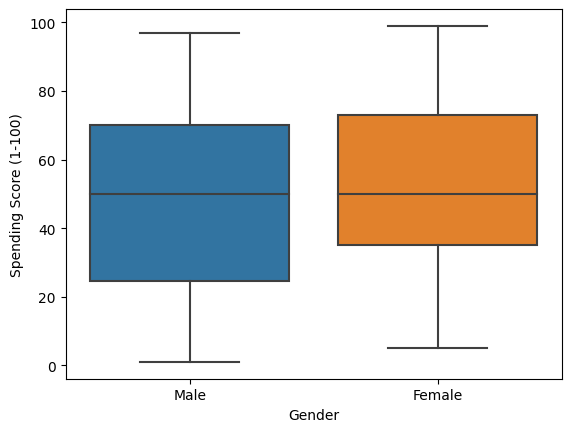

In [ ]:
sns.boxplot(y='Spending Score (1-100)', x='Gender', data=df)

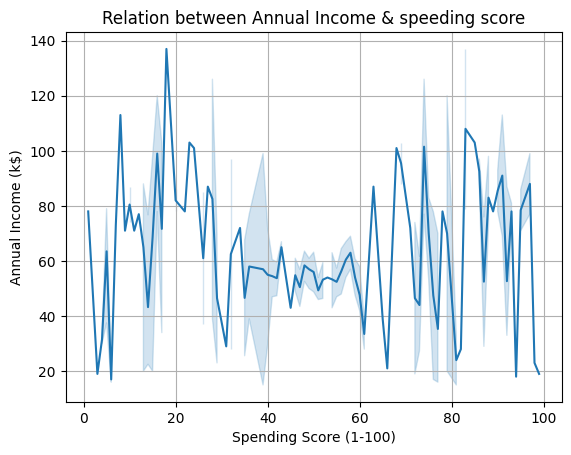

In [ ]:
sns.lineplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=df)
plt.title('Relation between Annual Income & speeding score')
plt.grid(True)

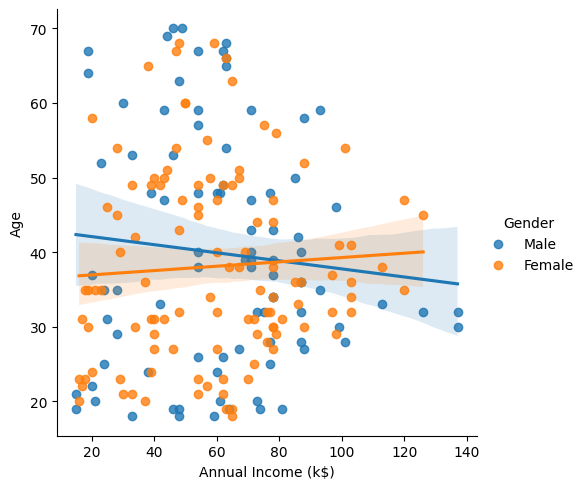

In [ ]:
sns.lmplot(x='Annual Income (k$)',y='Age',hue='Gender',data=df)

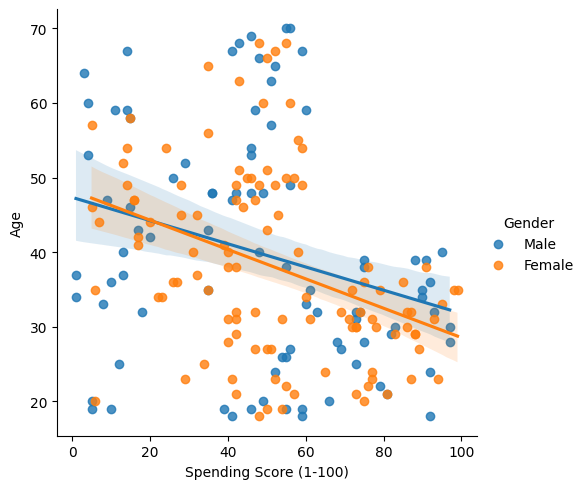

In [ ]:
sns.lmplot(x='Spending Score (1-100)',y='Age',hue='Gender',data=df)


<ipython-input-38-f03f6913fc42>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()


<Axes: >

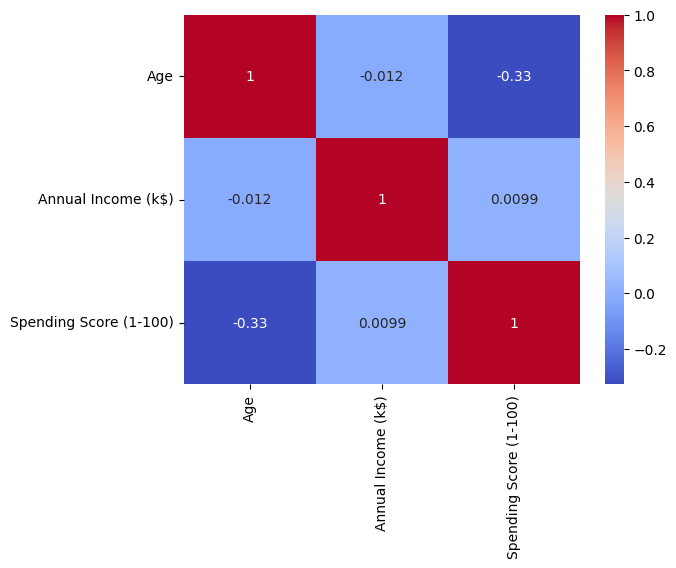

In [ ]:
#check multicordinality by correlation of number columns
corr_num=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr_num, annot=True, cmap='coolwarm')

##### Data preprocessing

In [ ]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])



In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [41]:
# Step 3: Select relevant features for clustering
features_for_clustering = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [44]:
#scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_clustering)

In [45]:
#select optional number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


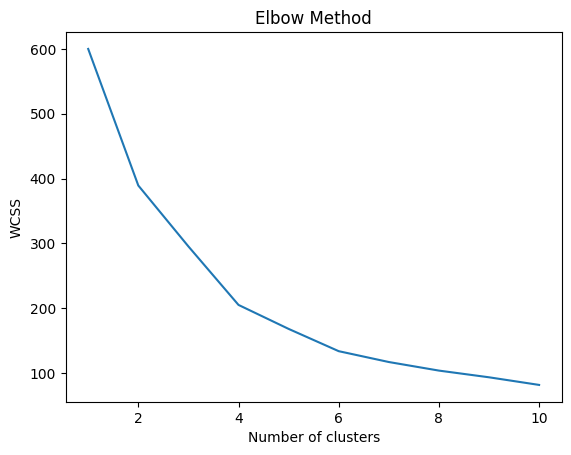

In [46]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
#let's make cluster =3
num_clusters=3

In [48]:
#let's apply k-means
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [50]:
#display dataset with cluster
print("\nDataset with Cluster Assignments:")
print(df.head())


Dataset with Cluster Assignments:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        2
1       1   21                  15                      81        2
2       0   20                  16                       6        2
3       0   23                  16                      77        2
4       0   31                  17                      40        2


In [52]:
# Interpret the Segments
segment_summary = df.groupby('Cluster').mean()
print("\nCluster Summary:")
print(segment_summary)


Cluster Summary:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.463415  32.853659           87.341463               79.975610
1        0.447917  50.406250           60.468750               33.343750
2        0.412698  25.142857           43.269841               56.507937


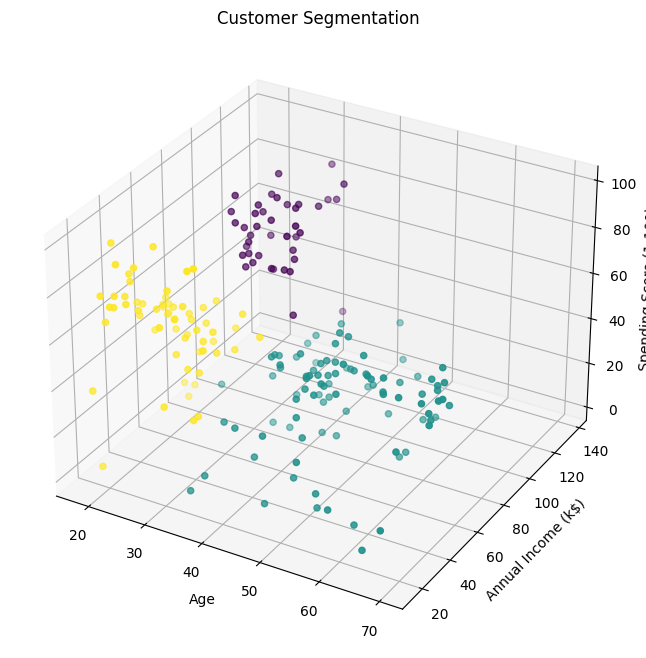

In [53]:
# Visualize result
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()

In [54]:
#let's assume two personas based on the average age and spending score of each cluster.
persona_data = pd.DataFrame()
persona_data['Cluster'] = segment_summary.index
persona_data['Average_Age'] = segment_summary['Age']
persona_data['Average_Spending_Score'] = segment_summary['Spending Score (1-100)']

# Print the personas
print("\nCustomer Personas:")
print(persona_data)


Customer Personas:
   Cluster  Average_Age  Average_Spending_Score
0        0    32.853659               79.975610
1        1    50.406250               33.343750
2        2    25.142857               56.507937
